In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
train_df=pd.read_excel("../data/train_nor_811.xlsx")
test_df=pd.read_excel("../data/test_nor_811.xlsx")
valid_df=pd.read_excel("../data/valid_nor_811.xlsx")

In [16]:
import re
import json
from pyvi import ViTokenizer
slang_dict = {
    "vk": "vợ", "ck": "chồng", "mk": "mình", "ib": "nhắn tin",
    "ntn": "như thế nào", "dc": "được", "ko": "không", "k": "không",
    "j": "gì", "r": "rồi", "tl": "trả lời", "lm": "làm",
    "vs": "với", "đt": "điện thoại", "fb": "facebook", "ad": "quản trị viên",
    "g9": "good night", "off": "tắt máy", "on": "bật máy", "pm": "nhắn riêng",
    "omg": "ôi trời ơi", "wtf": "cái quái gì thế", ":))":"vui vẻ","ik":"đi",
    "vl":"bất ngờ","m":"mày","t":"tao","đc":"được","cmm":"tức giận","dmm":"tức giận",
    "kkk":"hài hước","per":"thằng này "
}
with open('slang_dict.json', 'w', encoding='utf-8') as f:
    json.dump(slang_dict, f, ensure_ascii=False, indent=4)
def load_slang_dict(slang_path="slang_dict.json"):
    with open(slang_path, "r", encoding="utf-8") as f:
        return json.load(f)
def normalize_teencode(text, slang_dict):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang_dict.keys()) + r')\b')
    text = pattern.sub(lambda x: slang_dict[x.group()], text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = ViTokenizer.tokenize(text)
    return text
sample_text = "ck oi, hum nay mk dc off sớm nè, ib cho vk ik "
normalized = normalize_teencode(sample_text,slang_dict)
print(f"Original: {sample_text}")
print(f"Normalized: {normalized}")

Original: ck oi, hum nay mk dc off sớm nè, ib cho vk ik 
Normalized: chồng oi , hum nay mình được tắt máy sớm nè , nhắn_tin cho vợ đi


In [17]:
train_df["Sentence"] = train_df["Sentence"].apply(lambda x: normalize_teencode(x, slang_dict))
valid_df["Sentence"] = valid_df["Sentence"].apply(lambda x: normalize_teencode(x, slang_dict))
test_df["Sentence"] = test_df["Sentence"].apply(lambda x: normalize_teencode(x, slang_dict))

In [20]:
from sklearn.utils import resample
df_anger=train_df[train_df["Emotion"]=="Anger"]
df_fear=train_df[train_df["Emotion"]=="Fear"]
df_surprise=train_df[train_df["Emotion"]=="Surprise"]
anger=resample(df_anger,replace=True,n_samples=400,random_state=42)
fear=resample(df_fear,replace=True,n_samples=400,random_state=42)
surprise=resample(df_surprise,replace=True,n_samples=400,random_state=42)
df_balance_re=pd.concat([train_df,anger,fear,surprise])
df_balance_re=df_balance_re.sample(frac=1,random_state=42)

<Axes: xlabel='Emotion', ylabel='count'>

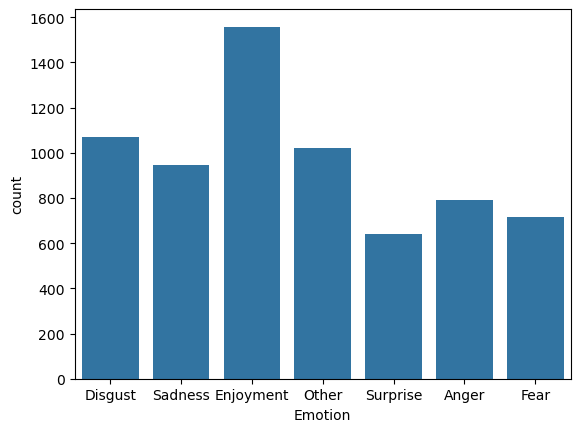

In [21]:
sns.countplot(data=df_balance_re,x="Emotion")

In [23]:
df_balance_re.to_csv("train_resample.csv",index=False)